# Market Basket Analysis of Retail Data Using Apriori Algorithm

## Introduction
Market Basket Analysis is one of the key methods used by retailers and stores to identify associations between items purchased by customers. It works by looking for combinations of items that occur together frequently in transactions. For example, Amazon uses ‘item-to-item collaborative filtering’ where it runs recommendation algorithms based on the item-search history of the customer to improve the shopping experience. In the case of offline retailers, this is used to identify items that can be placed next to another, also items whose availability increases the sale of another.
#### Association Rules
Market Basket Analysis (MBA) is done based on some rules known as Association Rules, widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in the transaction data using concepts of probability. Given items A and B,
<img src="MBA_rules_SCL.png">
* Support refers to the percentage of baskets where the rule is true (both left and right side products were present), this is also referred to as the frequency of items bought over all transactions.
* Confidence measures what percentage of baskets that contained the left-hand product also contained the right.
* Lift/Correlation measures how much more frequently the left-hand item is found with the right than without the right.

#### Example:
<img src="MBA_Example.png">

In practice, a rule needs the support of several hundred transactions, before it can be considered statistically significant, and datasets often contain thousands or millions of transactions.

## MBA Example in Python using Apriori Algorithm

In [1]:
%matplotlib inline
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
#make sure mlxtend is installed. pip install mlxtend

#### Data Details

In [2]:
data = pd.read_excel("Online Retail.xlsx")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [3]:
data.isnull().any()
# It can be seen here that some customerID are not present but that shouldn't be a problem since all 
#invoice number are available. Also, some descriptions are unavailble, such rows will be removed 
#since our main goal depends on the items.

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240992 entries, 0 to 240991
Data columns (total 8 columns):
InvoiceNo      240992 non-null object
StockCode      240992 non-null object
Description    240091 non-null object
Quantity       240992 non-null int64
InvoiceDate    240992 non-null datetime64[ns]
UnitPrice      240992 non-null float64
CustomerID     173555 non-null float64
Country        240992 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 14.7+ MB


## Data Preprocessing

In [5]:
# Deleting rows without a Description, these are rows without items
data.dropna(axis=0, subset=['Description'], inplace=True)

In [6]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,240091.000000,240091.000000,173555.000000
mean,9.289823,5.141353,15277.911844
std,222.566805,119.973098,1724.425506
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13846.000000
50%,3.000000,2.100000,15145.000000
75%,10.000000,4.210000,16814.000000
max,74215.000000,38970.000000,18287.000000


#### Taking only positive quantity entries

In [8]:
# Negative quantities can be seen as items returned, which can be due to damages, 
#too much quantities bought and so on
dataPositive=data[data['Quantity']>=0]
dataPositive.describe()

,Quantity,UnitPrice,CustomerID
count,235537.000000,235537.000000,169407.000000
mean,10.402777,4.128220,15285.608629
std,158.292464,37.293037,1724.181258
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13863.000000
50%,3.000000,2.100000,15157.000000
75%,10.000000,4.180000,16823.000000
max,74215.000000,13541.330000,18287.000000


In [9]:
dataPositive

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [10]:
#Examining the number of sales by country
dataPositive.groupby(['Country'])['InvoiceNo'].count()

Country
Australia                  630
Austria                    124
Bahrain                     18
Belgium                    914
Brazil                      32
Canada                      68
Channel Islands            363
Cyprus                     350
Czech Republic              15
Denmark                    184
EIRE                      2966
European Community          31
Finland                    307
France                    3579
Germany                   3959
Greece                      85
Hong Kong                  199
Iceland                    102
Israel                      36
Italy                      299
Japan                      230
Lebanon                     45
Lithuania                   35
Malta                       45
Netherlands               1139
Norway                     368
Poland                     180
Portugal                   610
Saudi Arabia                 9
Singapore                  113
Spain                     1136
Sweden                     195


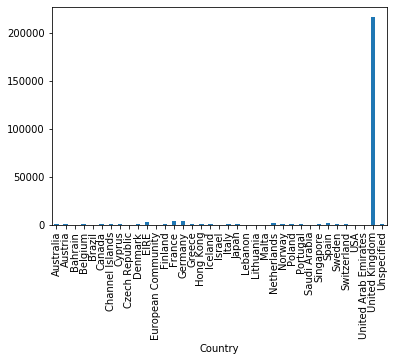

In [11]:
dataPositive.groupby(['Country'])['InvoiceNo'].count().plot.bar()
#It can be seen that a large percent of the data comes from the United Kingdom, 
#this can imply that the result will be 
#statistically significant for retails in the United Kingdom more that in the other countries.

## Market Basket Development

In [12]:
basket= (dataPositive.groupby(['InvoiceNo', 'Description'])['Quantity']
         .sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))

In [13]:
basket

Description,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,...,did a credit and did not tick ret,found,incorrectly credited C550456 see 47,mailout,mailout,on cargo order,rcvd be air temp fix for dotcom sit,returned,to push order througha s stock was,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Encoding our basket to return 0 or 1 when an item is not purchased, or purchased respectively.
def encode_units(x):
    if x<=0:
        return 0
    else:
        return 1
    
basket_encoded = basket.applymap(encode_units)
basket_encoded

Description,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,...,did a credit and did not tick ret,found,incorrectly credited C550456 see 47,mailout,mailout,on cargo order,rcvd be air temp fix for dotcom sit,returned,to push order througha s stock was,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# retrieving only rows where an invoice contains more than one item
basket_filtered = basket_encoded[(basket_encoded>0).sum(axis=1)>=2]
basket_filtered

Description,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,...,did a credit and did not tick ret,found,incorrectly credited C550456 see 47,mailout,mailout,on cargo order,rcvd be air temp fix for dotcom sit,returned,to push order througha s stock was,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Applying the Apriori Algorithm

#### Apriori Algorithm
Apriori is a popular algorithm for extracting frequent itemsets with applications in association rule learning. The apriori algorithm has been designed to operate on databases containing transactions, such as purchases by customers of a store. An itemset is considered as "frequent" if it meets a user-specified support threshold. For instance, if the support threshold is set to 0.5 (50%), a frequent itemset is defined as a set of items that occur together in at least 50% of all transactions in the database.


Using the Apriori algorithm in MLXTEND library to mine frequent itemsets and association rules, I pass min_support=0.03 to return all the rules that have a support of at least 3%, and sort the rules by decreasing support.

In [16]:
#Frequent set
frequent_itemsets = apriori(basket_filtered,
                            min_support=0.03,
                            use_colnames=True).sort_values('support', 
                                                           ascending=False).reset_index(drop=True)
frequent_itemsets["length"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))
print(frequent_itemsets)

      support                                           itemsets  length
0    0.144475               (WHITE HANGING HEART T-LIGHT HOLDER)       1
1    0.127485                         (REGENCY CAKESTAND 3 TIER)       1
2    0.115118                          (JUMBO BAG RED RETROSPOT)       1
3    0.109686                                    (PARTY BUNTING)       1
4    0.089690                          (LUNCH BAG RED RETROSPOT)       1
5    0.084374                  (PACK OF 72 RETROSPOT CAKE CASES)       1
6    0.079982                    (ASSORTED COLOUR BIRD ORNAMENT)       1
7    0.077670                  (NATURAL SLATE HEART CHALKBOARD )       1
8    0.076745                (SET OF 3 CAKE TINS PANTRY DESIGN )       1
9    0.074202                         (JAM MAKING SET WITH JARS)       1
10   0.073047                            (HEART OF WICKER SMALL)       1
11   0.070851                          (JUMBO BAG PINK POLKADOT)       1
12   0.070273                           (JUMBO STOR

In [17]:
# Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('lift', 
                                                           ascending=False).reset_index(drop=True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.049584,0.042880,0.031785,0.641026,14.949202,0.029658,2.666262
1,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.042880,0.049584,0.031785,0.741240,14.949202,0.029658,3.672962
2,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.065534,0.034443,0.031785,0.485009,14.081531,0.029527,1.874900
3,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.034443,0.065534,0.031785,0.922819,14.081531,0.029527,12.107429
4,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.036177,0.067730,0.031785,0.878594,12.972009,0.029334,7.678961
5,(ROSES REGENCY TEACUP AND SAUCER ),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.067730,0.036177,0.031785,0.469283,12.972009,0.029334,1.816079
6,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.042880,0.065534,0.036177,0.843666,12.873715,0.033366,5.977360
7,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.065534,0.042880,0.036177,0.552028,12.873715,0.033366,2.136563
8,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.042880,0.067730,0.034443,0.803235,11.859360,0.031539,4.737975
9,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.067730,0.042880,0.034443,0.508532,11.859360,0.031539,1.947473


> The above table shows the top most associated pairs of items, alongisde their support, confidence and lift values.
They are the top 10 pairs that are recommended to be sold together.

## Conclusion
In the last dataframe, we can see that 
1. 92.28% of customers who bought “PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER" also bought “GREEN REGENCY TEACUP AND SAUCER".
2. 64.10% of customers who bought “GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER, ...” also bought “PINK REGENCY TEACUP AND SAUCER”. 
3. 37.80% of customers who bought “PACK OF 72 RETROSPOT CAKE CASES" also bought “60 TEATIME FAIRY CAKE CASES".


This data recommends products which we should sell together.



## References
1. Kumar, Gokul S. Basket Analysis and Prediction using Associative Data Mining and Apriori Algorithm [online], Available from: https://towardsdatascience.com/market-basket-analysis-using-associative-data-mining-and-apriori-algorithm-bddd07c6a71a, [cit. 09/30/2021]
2. Agrawal, Rakesh, and Ramakrishnan Srikant. "Fast algorithms for mining association rules." Proc. 20th int. conf. very large data bases, VLDB. Vol. 1215. 1994.
